# FraudPrediction of Auto Insurance Claim Amount

In [1]:
# Importing Packages from Python 

#Importing the packages pandas,Numpy,SeaBorn,matplotlib,math and Numpy 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [40]:
# Importing Dataset

fraud_data = pd.read_csv('C:/Users/Suraj/Jupyter Projects/Project11_Automobile_Insurance_Claim/Automobile_insurance_fraud.csv')
fraud_data.head(2)

# There are 1000 rows and 40 columns and fraud reported is the target variable.

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y


In [232]:
fraud_data.shape

(1000, 39)

In [41]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [43]:
fraud_data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [5]:
fraud_data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

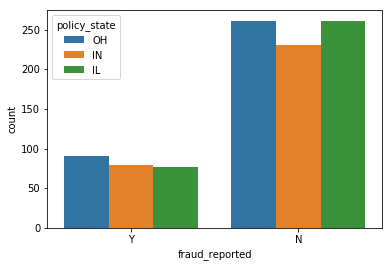

In [23]:
#count of the target variable
sns.countplot(x='fraud_reported',hue='policy_state', data=fraud_data)

# We can see that the Ohio state has reported more frauds in comparison with other two states.

# Also, Ohio and Illinois state seem to be same when it also comes to not reporting any frauds.

In [234]:
fraud_data.isnull().sum()

# There are no missing values in the dataset.

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

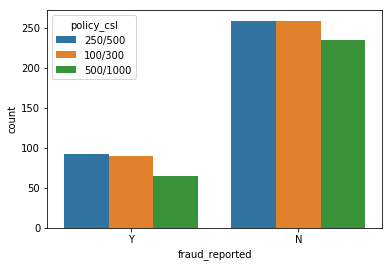

In [26]:
sns.countplot(x='fraud_reported',hue='policy_csl', data=fraud_data)

# The number of frauds reported for csl 250/200 and 100/300 seem to be more in comparison with 500/100

# The number of no frauds interestingly seem to be the same for both 250/100and 100/300 .

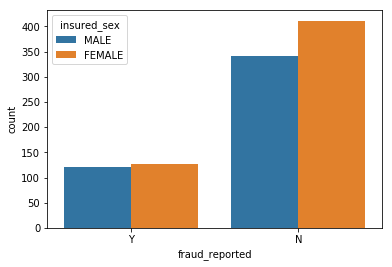

In [28]:
sns.countplot(x='fraud_reported',hue='insured_sex', data=fraud_data)

# The frauds reported/not reported were more from female applicants

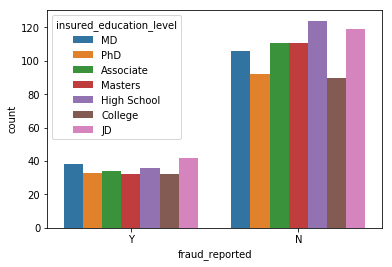

In [30]:
sns.countplot(x='fraud_reported',hue='insured_education_level', data=fraud_data)

# The frauds reported mostly from JD's more in number whereas the fraud not reported consisted of High School education level more in number

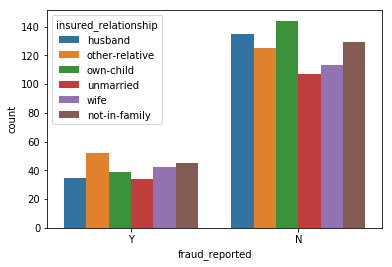

In [34]:
sns.countplot(x='fraud_reported',hue='insured_relationship', data=fraud_data)

# Majority of the applicants who were reported fraud had insurance claim for their other relatives
# who were not reported fraud had insured for their own child and husband.

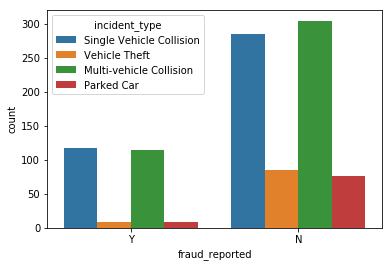

In [35]:
sns.countplot(x='fraud_reported',hue='incident_type', data=fraud_data)

# The incident type where fraud was reported was given as single and multi-vehicle collision 
# and those that didn't report fraud had more number of multi-vehicle collisions. 

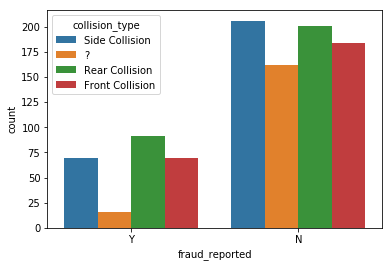

In [36]:
sns.countplot(x='fraud_reported',hue='collision_type', data=fraud_data)

# Frauds reported had more rear collision types while one that was not reported fraud had more side collision types.

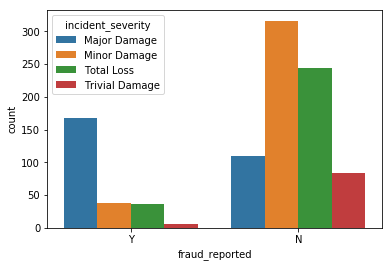

In [37]:
sns.countplot(x='fraud_reported',hue='incident_severity', data=fraud_data)

# Frauds reported had more major damage whereas frauds not reported had more minor damages.


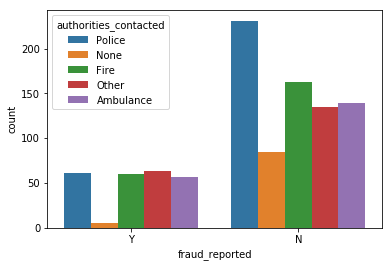

In [38]:
sns.countplot(x='fraud_reported',hue='authorities_contacted', data=fraud_data)

# IN cases when fraud was reported Other authorities were contacted and incase where fraud were not reported police was contacted first.

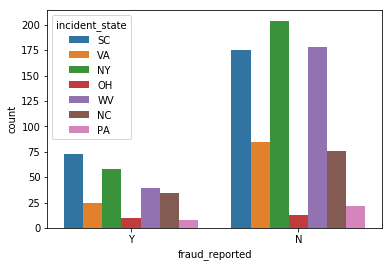

In [39]:
sns.countplot(x='fraud_reported',hue='incident_state', data=fraud_data)

# More frauds were reported in SC state and state where no frauds were reported was in NY.

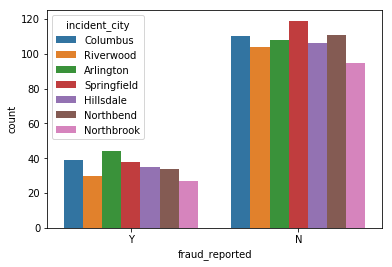

In [40]:
sns.countplot(x='fraud_reported',hue='incident_city', data=fraud_data)

# The city with more number of frauds were reported in Arlington and city with no frauds was Springfield.

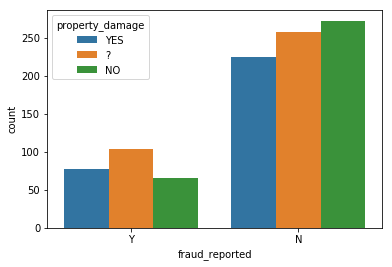

In [5]:
sns.countplot(x='fraud_reported',hue='property_damage', data=fraud_data)

# The fraud reported had a different reason for insurance other than property damage while those who were not 
# reported fradulent had no property damage. 

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y


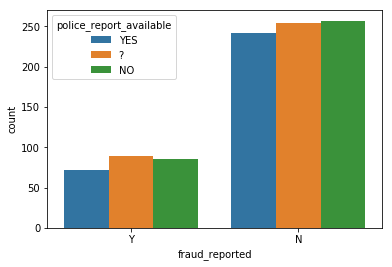

In [235]:
sns.countplot(x='fraud_reported',hue='police_report_available', data=fraud_data)

# When the fraud was reported it is unknown if people had a police report available.


fraud_data.head(2)

In [44]:
# Dropping the columns with dates since they are not relevant for the analysis 

fraud_data.drop(['policy_bind_date','incident_date','auto_year'],axis=1,inplace=True)

fraud_data.head(2)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,0,?,5070,780,780,3510,Mercedes,E400,Y


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fraud_data['fraud_reported']=le.fit_transform(fraud_data['fraud_reported'])

In [48]:
fraud_data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported'],
      dtype='object')

In [50]:
fraud_data.drop(['policy_number','insured_zip','incident_location','incident_hour_of_the_day'],axis=1, inplace=True)

In [51]:
fraud_data.head(10)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,1
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,?,5070,780,780,3510,Mercedes,E400,1
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,0
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,RSX,0
5,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,0,2,NO,64100,6410,6410,51280,Saab,95,1
6,137,34,IN,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,...,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,0
7,165,37,IL,100/300,1000,1137.03,0,MALE,Associate,tech-support,...,2,2,YES,51590,9380,9380,32830,Audi,A5,0
8,27,33,IL,100/300,500,1442.99,0,FEMALE,PhD,other-service,...,1,1,YES,27700,2770,2770,22160,Toyota,Camry,0
9,212,42,IL,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,...,2,1,?,42300,4700,4700,32900,Saab,92x,0


In [52]:
fraud_data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [53]:
fraud_data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [54]:
fraud_data['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [55]:
# Replace ? with 0 

fraud_data['property_damage'].replace(to_replace='YES',value=1,inplace=True)
fraud_data['property_damage'].replace(to_replace='NO',value=0,inplace=True)
fraud_data['property_damage'].replace(to_replace='?',value=0,inplace=True)


In [56]:
fraud_data['police_report_available'].replace(to_replace='YES',value=1,inplace=True)
fraud_data['police_report_available'].replace(to_replace='NO',value=0,inplace=True)
fraud_data['police_report_available'].replace(to_replace='?',value=0,inplace=True)


In [58]:
# Converting collision_type to using label encoder from  ? to 0
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fraud_data['collision_type']=le.fit_transform(fraud_data['collision_type'])

In [59]:
fraud_data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,1,71610,6510,13020,52080,Saab,92x,1
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,0,5070,780,780,3510,Mercedes,E400,1
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,0,34650,7700,3850,23100,Dodge,RAM,0
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,0,6500,1300,650,4550,Accura,RSX,0


In [61]:
fraud_data.shape

(1000, 32)

In [62]:
fraud_data._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'collision_type', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [63]:
fraud_data.select_dtypes(include=['object']).columns 

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'auto_make', 'auto_model'],
      dtype='object')

In [64]:
dummies= pd.get_dummies(fraud_data[[
    'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'auto_make', 'auto_model']])

In [67]:
dummies.head(5)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [68]:
dummies.shape

(1000, 135)

In [69]:
X = pd.concat([dummies, fraud_data._get_numeric_data()], axis=1)  # joining numeric columns
X.head(5)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,0,0,1,0,1,0,0,1,0,0,...,1,1,1,2,1,71610,6510,13020,52080,1
1,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,5070,780,780,3510,1
2,0,0,1,1,0,0,1,0,0,0,...,3,0,2,3,0,34650,7700,3850,23100,0
3,1,0,0,0,1,0,1,0,0,0,...,1,0,1,2,0,63400,6340,6340,50720,1
4,1,0,0,0,0,1,0,1,1,0,...,1,0,0,1,0,6500,1300,650,4550,0


In [70]:
# Assigning y 

y = X['fraud_reported']

In [71]:
X = X.drop(['fraud_reported'],axis=1)

In [72]:
X.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,collision_type,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,0,0,1,0,1,0,0,1,0,0,...,3,1,1,1,2,1,71610,6510,13020,52080
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,5070,780,780,3510
2,0,0,1,1,0,0,1,0,0,0,...,2,3,0,2,3,0,34650,7700,3850,23100
3,1,0,0,0,1,0,1,0,0,0,...,1,1,0,1,2,0,63400,6340,6340,50720
4,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,1,0,6500,1300,650,4550


In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

C:\Users\Suraj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Suraj\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [77]:
#Splitting Data to Train and Test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)



In [78]:
#Importing Logistic Regression from Scikit Learn

from sklearn.linear_model import LogisticRegression

In [79]:
lr=LogisticRegression()

In [80]:
lr.fit(X_train,y_train)

C:\Users\Suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
#Predicting X_Test

pred = lr.predict(X_test)

In [83]:
from sklearn.metrics import classification_report

In [84]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.88      0.87       225\n           1       0.61      0.57      0.59        75\n\n   micro avg       0.80      0.80      0.80       300\n   macro avg       0.74      0.73      0.73       300\nweighted avg       0.80      0.80      0.80       300\n'

In [86]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, pred))

0.8033333333333333


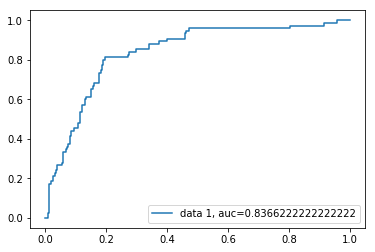

In [88]:
# AUC 

# AUC shows an accuracy of 83.6%

y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()